<span dir="rtl" align="right">

# **تحليل استكشافي حول الأفلام حتى عام ٢٠١٧**
</span>

<span dir="rtl" align="right">
    
## نبذة عن ملفات البيانات
- ملفات تشمل بيانات الأفلام لـ ٤٥٫٠٠٠ فيلم من قاعدة بيانات تدعى موڤي لينز.
- تحتوي على جميع الأفلام التي تم إصدارها خلال شهر يوليو ٢٠١٧ وما قبله.
- البيانات تشمل الطاقم والممثلين، الحبكة، الميزانية، الايرادات، الملصقات، تواريخ الإصدار، اللغات، شركات الانتاج، الدول المنتجة، تقييمات الجمهور على موقع تي إم دي بي.

    
</span>

<span dir="rtl" align="right">

## سنستعرض في هذا التحليل:
- أكثر الكلمات تكرارًا في عناوين الأفلام. 
- سلاسل الأفلام الناجحة من حيث العوائد. 
- أكثر شركات الانتاج نجاحًا من متوسط الأرباح بالنسبة لعدد الأفلام المنتَجة. 
- أكثر اللغات المستخدمة كلغة للفيلم، وعدد الأفلام بهذه اللغة. 
- العلاقة بين عوائد الفيلم وتاريخ الاصدار، هل هناك أشهر معينة تزيد فيها أرباح الأفلام المنتَجة؟
- أعلى الأفلام من حيث تكلفة الانتاج.
- توزيع الأفلام من حيث التصنيف (دراما، أكشن، كوميدي، إلخ). 
- أعلى العوائد للأفلام من حيث التصنيف. 
- أكثر الممثلين نجاحًا من حيث العوائد.    
   
    
</span>

<span dir="rtl" align="right">

### تثبيت مكتبة تشارت ستديو وتحديث (pip) قبل استدعاء المكتبات اللازمة (لا بد من تشغيل الانترنت ضمن إعدادات النوت بوك)
</span>

In [3]:
!pip install chart_studio
!pip install --upgrade pip
!pip install wordcloud

Requirement already up-to-date: pip in /opt/anaconda3/lib/python3.7/site-packages (20.2.3)
     |████████████████████████████████| 161 kB 185 kB/s eta 0:00:01


<span dir="rtl" align="right">

### استدعاء المكتبات اللازمة (لا بد من إزالة المكتبات الزائدة بعد التنظيف)
</span>

In [4]:
%matplotlib inline
from IPython.display import Image, HTML
import json
import datetime
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')
import chart_studio
chart_studio.tools.set_credentials_file(username='DemoAccount', api_key='lr1c37zw81')
import chart_studio.plotly as py
from chart_studio.plotly import plot, iplot

sns.set_style('whitegrid')
sns.set(font_scale=1.25)
pd.set_option('display.max_colwidth', 50)

<span dir="rtl" align="right">

### قراءة واستعراض ملف البيانات (ملف خصائص الأفلام)
</span>

In [5]:
df = pd.read_csv('movies_metadata.csv')
df.head().transpose()

,0,1,2,3,4
adult,False,False,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,30000000,65000000,0,16000000,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862
imdb_id,tt0114709,tt0113497,tt0113228,tt0114885,tt0113041
original_language,en,en,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...


In [6]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

<span dir="rtl" align="right">
    

### الخصائص
 
    
* **adult - للكبار:** Indicates if the movie is X-Rated or Adult.
* **belongs_to_collection - ضمن سلسلة:** A stringified dictionary that gives information on the movie series the particular film belongs to.
* **budget - الميزانية:** The budget of the movie in dollars.
* **genres - التصنيف:** A stringified list of dictionaries that list out all the genres associated with the movie.
* **homepage:** The Official Homepage of the movie.
* **id - الرقم التسلسلي:** The ID of the movie.
* **imdb_id - الرقم التسلسلي للفيلم على موقع IMDB:** The IMDB ID of the movie.
* **original_language - لغة الفيلم الأساسية:** The language in which the movie was originally shot in.
* **original_title - عنوان الفيلم الأساسي:** The original title of the movie.
* **overview - نبذة:** A brief blurb of the movie.
* **popularity - مقياس شعبية الفيلم بحسب موقع IMDB:** The Popularity Score assigned by TMDB.
* **poster_path - رابط ملصق الفيلم:** The URL of the poster image.
* **production_companies - شركات الانتاج:** A stringified list of production companies involved with the making of the movie.
* **production_countries - دول الانتاج:** A stringified list of countries where the movie was shot/produced in.
* **release_date - تاريخ الاصدار:** Theatrical Release Date of the movie.
* **revenue - الايرادات:** The total revenue of the movie in dollars.
* **runtime - مدة الفيلم:** The runtime of the movie in minutes.
* **spoken_languages - اللغات المستخدمة في الفيلم:** A stringified list of spoken languages in the film.
* **status - الحالة:** The status of the movie (Released, To Be Released, Announced, etc.)
* **tagline - سطر الوصف:** The tagline of the movie.
* **title - العنوان:** The Official Title of the movie.
* **video - فيديو الفيلم في موقع TMDB:** Indicates if there is a video present of the movie with TMDB.
* **vote_average - متوسط تقييم الفيلم:** The average rating of the movie.
* **vote_count - عدد المقيمين للفيلم في موقع TMDB:** The number of votes by users, as counted by TMDB.
    
</span>

<span dir="rtl" align="right">

### للاستعلام عن حجم البيانات ومعلوماتها
</span>

In [7]:
df.shape

(45466, 24)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

<span dir="rtl" align="right">

## تجهيز البيانات 

</span>

<span dir="rtl" align="right">

### استبدال العناوين الأصلية للأفلام بالعنوان المترجم وحذف العنوان الأصلي
</span>

In [9]:
# حذف العنوان الأصلي للفيلم والاعتماد على العنوان المترجم
df = df.drop('original_title', axis=1)

In [10]:
# التحقق من الأفلام التي تحمل إيرادات غير مسجلة (صفر)
df[df['revenue'] == 0].shape

(38052, 23)

In [11]:
# استبدال الأفلام ذات الإيرادات صفر إلى قيمة مفقودة
df['revenue'] = df['revenue'].replace(0, np.nan)

The **budget** feature has some unclean values that makes Pandas assign it as a generic object. We proceed to convert this into a numeric variable and replace all the non-numeric values with NaN. Finally, as with budget, we will convert all the values of 0 with NaN to indicate the absence of information regarding budget.

In [12]:
# تحويل الميزانية من قيمة object 
# إلى قيمة رقمية
# ثم استبدال كل قيمة صفرية غير مسجلة بقيمة مفقودة
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['budget'] = df['budget'].replace(0, np.nan)
df[df['budget'].isnull()].shape

(36576, 23)

<span dir="rtl" align="right">

#### سنقوم بانشاء عمود جديد للعوائد، سنوجد قيمة العوائد من خلال قسمة الإيرادات على الميزانية.
</span>

In [13]:
df['return'] = df['revenue'] / df['budget']

In [14]:
def clean_numeric(x):
    try:
        return float(x)
    except:
        return np.nan

<span dir="rtl" align="right">

#### سنقوم بتحويل السنة إلى رقم في عمود منفصل من خلال استخراجه من تاريخ إصدار الفيلم
</span>

In [15]:
df['year'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)
df['year'] = df['year'].replace('NaT', np.nan)
df['year'] = df['year'].apply(clean_numeric)

<span dir="rtl" align="right">

### استعراض أكثر الكلمات تكرارًا في عناوين الأفلام
</span>

In [16]:
# تحويل نوع العمود إلى نص
df['title'] = df['title'].astype('str')
title_corpus = ' '.join(df['title'])

Matplotlib is building the font cache using fc-list. This may take a moment.


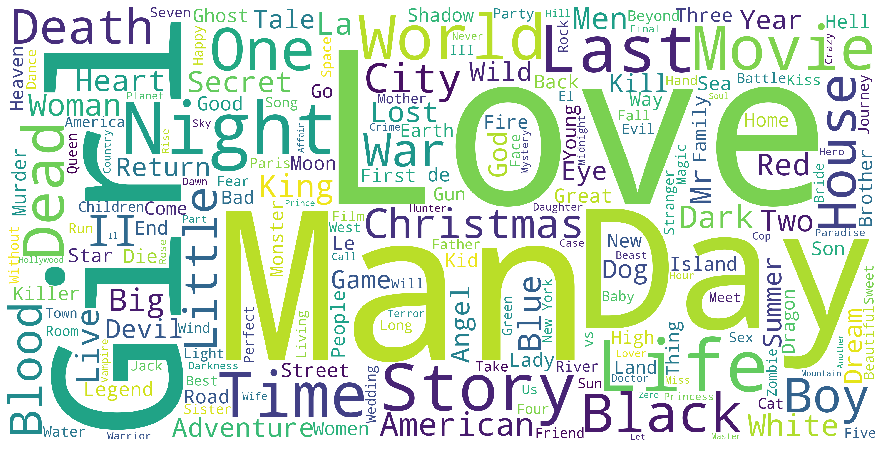

In [17]:
# رسم الصورة
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

<span dir="rtl" align="right">

### كلمة Love هي أكثر كلمة تكرر استعمالها في عناوين الأفلام، تليها كلمات مثل Girl, Day, Man, أيضًا تكرر استعمالهن كثيرًا، وهذا قد يرجع إلى ميل الأفلام إلى اظهار الطابع الرومانسي.
</span>

<span dir="rtl" align="right">

## سلاسل الأفلام
</span>

In [18]:
# تنظيف بيانات سلاسل الأفلام
df_fran = df[df['belongs_to_collection'].notnull()]
df_fran['belongs_to_collection'] = df_fran['belongs_to_collection'].apply(ast.literal_eval).apply(lambda x: x['name'] if isinstance(x, dict) else np.nan)
df_fran = df_fran[df_fran['belongs_to_collection'].notnull()]

In [19]:
fran_pivot = df_fran.pivot_table(index='belongs_to_collection', values='revenue', aggfunc={'revenue': ['mean', 'sum', 'count']}).reset_index()

<span dir="rtl" align="right">

### أكثر سلاسل الأفلام نجاحًا بحسب معدل الإيرادات
</span>

In [20]:
# سنتعرض معدل نجاح السلاسل بحسب معدل الإيرادات
fran_pivot.sort_values('mean', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
112,Avatar Collection,1,2.787965e+09,2.787965e+09
1245,The Avengers Collection,2,1.462481e+09,2.924962e+09
479,Frozen Collection,1,1.274219e+09,1.274219e+09
446,Finding Nemo Collection,2,9.844532e+08,1.968906e+09
1352,The Hobbit Collection,3,9.785078e+08,2.935523e+09
1388,The Lord of the Rings Collection,3,9.721816e+08,2.916545e+09
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
325,Despicable Me Collection,4,9.227676e+08,3.691070e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09


<span dir="rtl" align="right">

#### تعد سلسلة أفاتار Avatar والتي تتكون من فيلم واحد فقط في ذلك الوقت، هي أكثر سلسلة ناجحة من حيث معدل الإيرادات بما يقارب ٣ مليار دولار، تليها سلسلة هاري بوتر Harry Potter المكونة من خمسة أفلام في ذلك الوقت.
</span>

<span dir="rtl" align="right">

## شركات الانتاج
</span>

In [21]:
# تجهيز بيانات شركات الإنتاج
df['production_companies'] = df['production_companies'].fillna('[]').apply(ast.literal_eval)
df['production_companies'] = df['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [22]:
s = df.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'companies'

In [23]:
com_df = df.drop('production_companies', axis=1).join(s)

In [24]:
# تجميع الأفلام حسب شركات الإنتاج
# جمع إيرادات الأفلام لكل شركة
com_sum = pd.DataFrame(com_df.groupby('companies')['revenue'].sum().sort_values(ascending=False))
com_sum.columns = ['Total']
# معدل إيرادات الأفلام لكل شركة
com_mean = pd.DataFrame(com_df.groupby('companies')['revenue'].mean().sort_values(ascending=False))
com_mean.columns = ['Average']
# عدد الأفلام لكل شركة
com_count = pd.DataFrame(com_df.groupby('companies')['revenue'].count().sort_values(ascending=False))
com_count.columns = ['Number']
# تجميع القيم أعلاه معًا
com_pivot = pd.concat((com_sum, com_mean, com_count), axis=1)

<span dir="rtl" align="right">

### أكثر شركات الانتاج نجاحًا
#### ما هي شركات الانتاج التي انتجت أعلى متوسط في عدد الأفلام الناجحة؟ سنأخذ بالاعتبار الشركات التي انتجت على الأقل ١٥ فيلمًا

</span>

In [25]:
com_pivot[com_pivot['Number'] >= 15].sort_values('Average', ascending=False).head(10)

,Total,Average,Number
Pixar Animation Studios,1.118853e+10,6.215852e+08,18
Marvel Studios,1.169964e+10,6.157703e+08,19
Revolution Sun Studios,8.120339e+09,5.413559e+08,15
Lucasfilm,9.898421e+09,4.499282e+08,22
DreamWorks Animation,1.370752e+10,4.031622e+08,34
DC Entertainment,6.212609e+09,3.882880e+08,16
Dentsu,6.853205e+09,3.807336e+08,18
Jerry Bruckheimer Films,8.957441e+09,3.732267e+08,24
Marvel Enterprises,6.538067e+09,3.441088e+08,19
Legendary Pictures,1.346866e+10,3.367166e+08,40


<span dir="rtl" align="right">

#### شركة بكسار أنيمشن ستديوز Pixal Animation Studios قد انتجت أكثر الأفلام نجاحًا من حيث المتوسط، وهذا ليس مفاجئًا باعتبار أنها الشركة المنتجة للعديد من أفلام الانميشن الناحجة مثل Finding Nemo, Inside Out, Wall-E, Toy Story, Cars وغيرهم. تليها مارفل ستديوز Marvel Studios التي حققت ٦١٥ مليون دولار وأشهر أفلامها Iron Man, The Avengers.

</span>

<span dir="rtl" align="right">

## لغة الفيلم الأصلية
### بما أن الانجليزية هي اللغة الأكثر استعمالاً، سنرى بقية اللغات وتوزيعها من حيث عدد الأفلام المستعملة لهذه اللغة كلغة أصلية
    
</span>

In [26]:
# عدد اللغات
df['original_language'].drop_duplicates().shape[0]

93

<span dir="rtl" align="right">

### سننشئ جدول بيانات جديد، ونضع فيه اللغات المستخدمة وتكرار استخدام كل لغة

</span>

In [27]:
lang_df = pd.DataFrame(df['original_language'].value_counts())
lang_df['language'] = lang_df.index
lang_df.columns = ['number', 'language']
lang_df.head()

,number,language
en,32269,en
fr,2438,fr
it,1529,it
ja,1350,ja
de,1080,de


There are over 93 languages represented in our dataset. As we had expected, English language films form the overwhelmingly majority. French and Italian movies come at a very distant second and third respectively. Let us represent the most popular languages (apart from English) in the form of a bar plot.

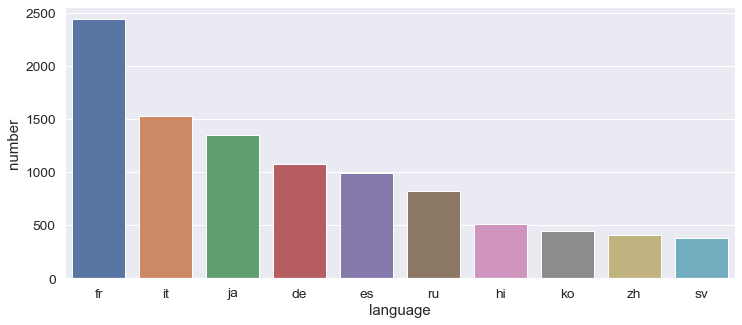

In [28]:
# استعراض عدد الأفلام لأبرز اللغات الغير إنجليزية
plt.figure(figsize=(12,5))
sns.barplot(x='language', y='number', data=lang_df.iloc[1:11])
plt.show()

<span dir="rtl" align="right">

#### اللغة الفرنسية والايطالية هي أكثر اللغات استعمالًا بعد الانجليزية. اليابانية والهندية هما الأعلى في اللغات الآسيوية.

</span>

<span dir="rtl" align="right">

## تواريخ الاصدار

</span>

<span dir="rtl" align="right">

#### سنقوم الآن باستخراج شهر اصدار الفيلم من عمود release_date ونضعه في عمود مستقل.

</span>

In [29]:
# أرقام الشهور
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [30]:
def get_month(x):
    try:
        return month_order[int(str(x).split('-')[1]) - 1]
    except:
        return np.nan

In [31]:
# الحصول على الشهر من التاريخ
df['month'] = df['release_date'].apply(get_month)

<span dir="rtl" align="right">

### الآن يمكننا رسم متوسط عوائد الأفلام الأكثر رواجًا بحسب شهر اصدار الفيلم 
</span>

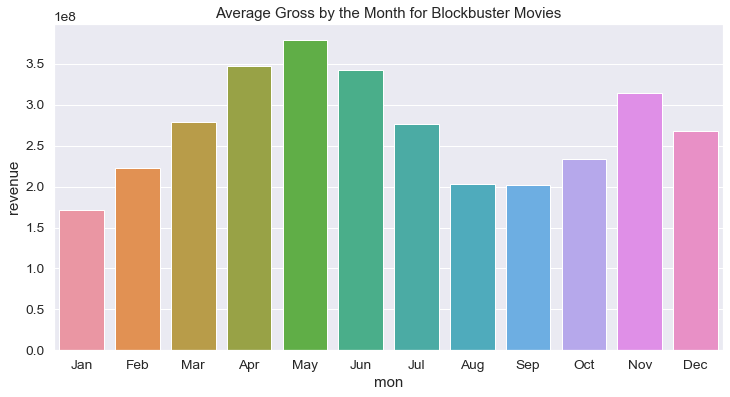

In [32]:
# انشاء جدول بيانات جديد يحتوي على الأفلام ذات متوسط الايرادات أعلى من مئة مليون دولار
# مجمعة حسب شهر اصدارها
month_mean = pd.DataFrame(df[df['revenue'] > 1e8].groupby('month')['revenue'].mean())

# تحديد عمود الشهر ليكون هو العمود الأساسي للترقيم
month_mean['mon'] = month_mean.index

# الرسم
plt.figure(figsize=(12,6))
plt.title("Average Gross by the Month for Blockbuster Movies")

# الشهر هو المحور السيني
# الايرادات هي المحور الصادي
sns.barplot(x='mon', y='revenue', data=month_mean, order=month_order)

<span dir="rtl" align="right">

#### يتضح من خلال الرسم أن شهر أبريل ومايو ويونيو هم أعلى الشهور من حيث متوسط الايرادات، حيث أنها تمثل شهور الصيف والتي يتوقع فيها أن يزيد استهلاك الأفراد في جانب الترفيه. 
</span>

<span dir="rtl" align="right">

## الميزانية

</span>

In [33]:
# ملخص إحصائي لميزانيات الأفلام
df['budget'].describe()

count    8.890000e+03
mean     2.160428e+07
std      3.431063e+07
min      1.000000e+00
25%      2.000000e+06
50%      8.000000e+06
75%      2.500000e+07
max      3.800000e+08
Name: budget, dtype: float64

<span dir="rtl" align="right">
معدل الميزانية هو ٢١ مليون تقريبا بينما الوسيط هو  ٨. مليون تقريبًا، مما يظهر أن لدينا قيم شاذة (أي أفلام ذات ميزانية ضخمة أعلى من الأغلب)
</span>

<span dir="rtl" align="right">

### أعلى الأفلام ميزانية

</span>

In [34]:
df[df['budget'].notnull()][['title', 'budget', 'revenue', 'return', 'year']].sort_values('budget', ascending=False).head(10)

,title,budget,revenue,return,year
17124,Pirates of the Caribbean: On Stranger Tides,380000000.0,1.045714e+09,2.751878,2011.0
11827,Pirates of the Caribbean: At World's End,300000000.0,9.610000e+08,3.203333,2007.0
26558,Avengers: Age of Ultron,280000000.0,1.405404e+09,5.019299,2015.0
11067,Superman Returns,270000000.0,3.910812e+08,1.448449,2006.0
44842,Transformers: The Last Knight,260000000.0,6.049421e+08,2.326701,2017.0
16130,Tangled,260000000.0,5.917949e+08,2.276134,2010.0
18685,John Carter,260000000.0,2.841391e+08,1.092843,2012.0
11780,Spider-Man 3,258000000.0,8.908716e+08,3.452991,2007.0
21175,The Lone Ranger,255000000.0,8.928991e+07,0.350157,2013.0
22059,The Hobbit: The Desolation of Smaug,250000000.0,9.584000e+08,3.833600,2013.0


<span dir="rtl" align="right">

#### تعد أفلام  Pirates of the Carribean هي الأعلى من حيث الميزانية بما يتعدى ٣٠٠ مليون دولار
</span>

Two **Pirates of the Carribean** films occupy the top spots in this list with a staggering budget of over **300 million dollars**. All the top 10 most expensive films made a profit on their investment except for **The Lone Ranger** which managed to recoup less than 35% of its investment, taking in a paltry 90 million dollars on a **255 million dollar** budget.

How strong a correlation does the budget hold with the revenue? A stronger correlation would directly imply more accurate forecasts.

<span dir="rtl" align="right">
هل توجد علاقة بين الميزانية و العائدات؟
</span>

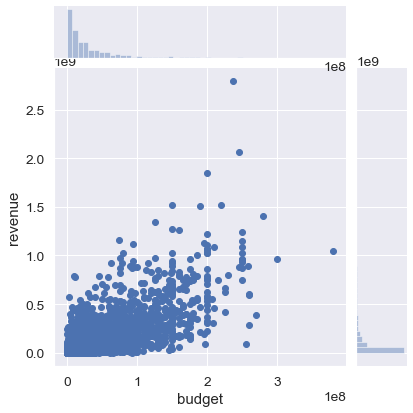

In [35]:
# علاقة الميزاينة مع الإيرادات
sns.jointplot(x='budget',y='revenue',data=df[df['return'].notnull()])

<span dir="rtl" align="right">

#### مما نلاحظه توجد علاقة طردية بين الإيرادات و الميزانية
</span>

<span dir="rtl" align="right">

## التصنيفات

</span>

In [36]:
# تجهيز بيانات تصنيف الأفلام
df['genres'] = df['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
s = df.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'

In [37]:
# إنشاء جدول بيانات جديد يحمل عمود genres.
gen_df = df.drop('genres', axis=1).join(s)

In [38]:
# لإيجاد إجمالي عدد التصنيفات لدينا
gen_df['genre'].value_counts().shape[0]

32

In [39]:
# إنشاء جدول بيانات جديد يحمل عدد الأفلام في كل تصنيف
pop_gen = pd.DataFrame(gen_df['genre'].value_counts()).reset_index()
pop_gen.columns = ['genre', 'movies']
pop_gen.head(10)

,genre,movies
0,Drama,20265
1,Comedy,13182
2,Thriller,7624
3,Romance,6735
4,Action,6596
5,Horror,4673
6,Crime,4307
7,Documentary,3932
8,Adventure,3496
9,Science Fiction,3049


<span dir="rtl" align="right">

## لرسم عدد الأفلام لكل تصنيف:
</span>

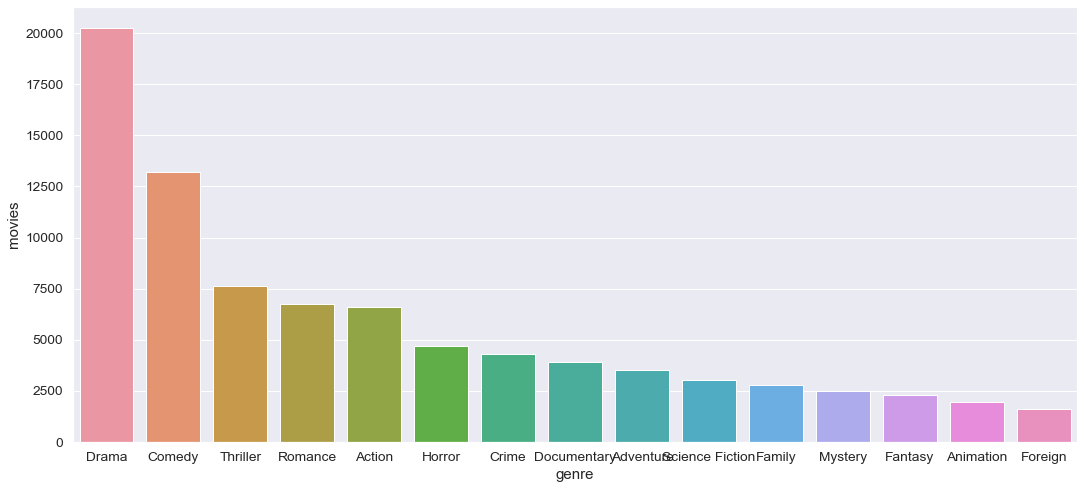

In [40]:
plt.figure(figsize=(18,8))
sns.barplot(x='genre', y='movies', data=pop_gen.head(15))
plt.show()

<span dir="rtl" align="right">

### نلاحظ أن أفلام الدراما تحوز على أكبر عدد من الأفلام، حوالي نصف عدد الأفلام في ملف البيانات تصنف على أنها أفلام دراما، تليها الأفلام الكوميدية بحوالي ٢٥٪ من إجمالي الأفلام، ثم البقية مثل أفلام الأكشن ثم الرعب، ثم الجريمة، وغيرها.
</span>

In [41]:
genres = ['Drama', 'Comedy', 'Thriller', 'Romance', 'Action', 'Horror', 'Crime', 'Adventure', 'Science Fiction', 'Mystery', 'Fantasy', 'Mystery', 'Animation']

<span dir="rtl" align="right">

###  سنقوم باستعراض نسب كل تصنيف من الأفلام لكل سنة في العقد العشرين
</span>

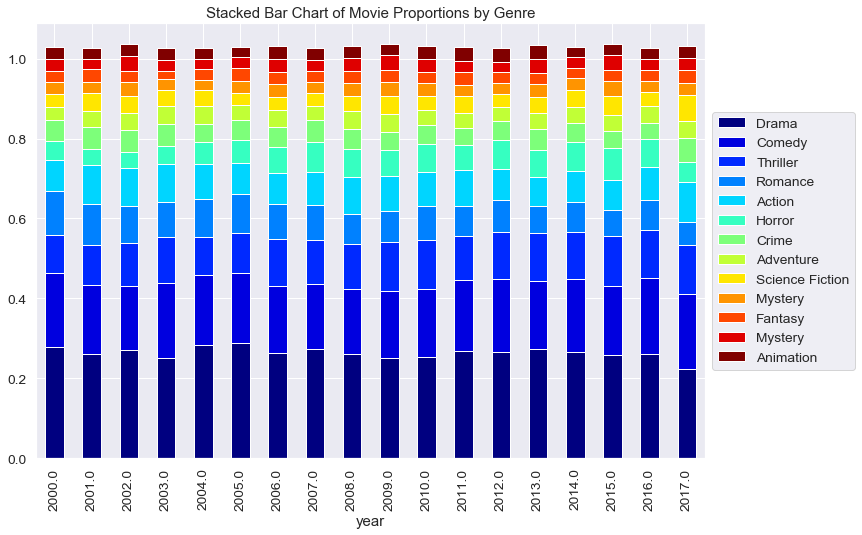

In [42]:
# لجلب الأفلام في العقد العشرين فقط
pop_gen_movies = gen_df[(gen_df['genre'].isin(genres)) & (gen_df['year'] >= 2000) & (gen_df['year'] <= 2017)]
# a cross-tabulation table that can show the frequency of each genrein a cerain year
ctab = pd.crosstab([pop_gen_movies['year']], pop_gen_movies['genre']).apply(lambda x: x/x.sum(), axis=1)
ctab[genres].plot(kind='bar', stacked=True, colormap='jet', figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Stacked Bar Chart of Movie Proportions by Genre")
plt.show()

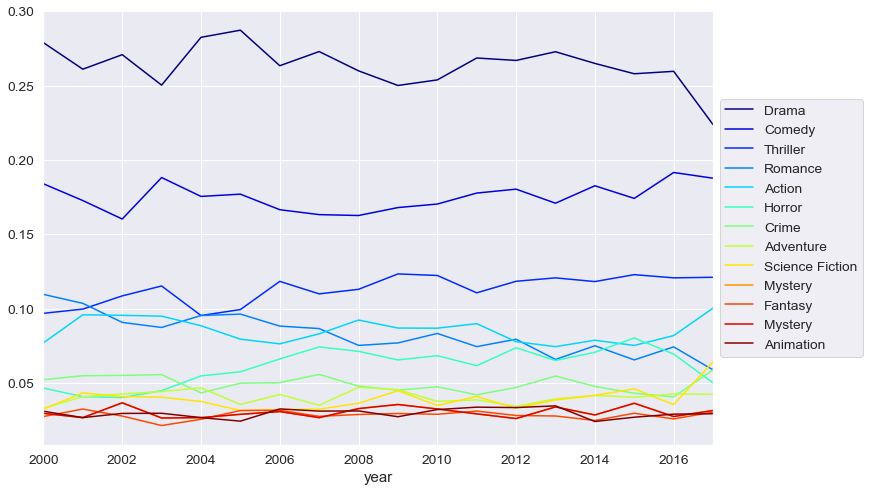

In [43]:
ctab[genres].plot(kind='line', stacked=False, colormap='jet', figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

The proportion of movies of each genre has remained fairly constant since the beginning of this century except for Drama. The proportion of drama films has fallen by over 5%. Thriller movies have enjoyed a slight increase in their share.

<span dir="rtl" align="right">

#### تقريبًا كم الأفلام لكل قسم بقي ثابتًا في كل عام على مدار العقد
#### حيث أن أفلام الدراما هي الأكثر ثم الكوميدية
</span>

In [44]:
# مسميات التصنيفات
violin_genres = ['Drama', 'Comedy', 'Thriller', 'Romance', 'Action', 'Horror', 'Crime', 'Science Fiction', 'Fantasy', 'Animation']
violin_movies = gen_df[(gen_df['genre'].isin(violin_genres))]

<Figure size 1296x576 with 0 Axes>

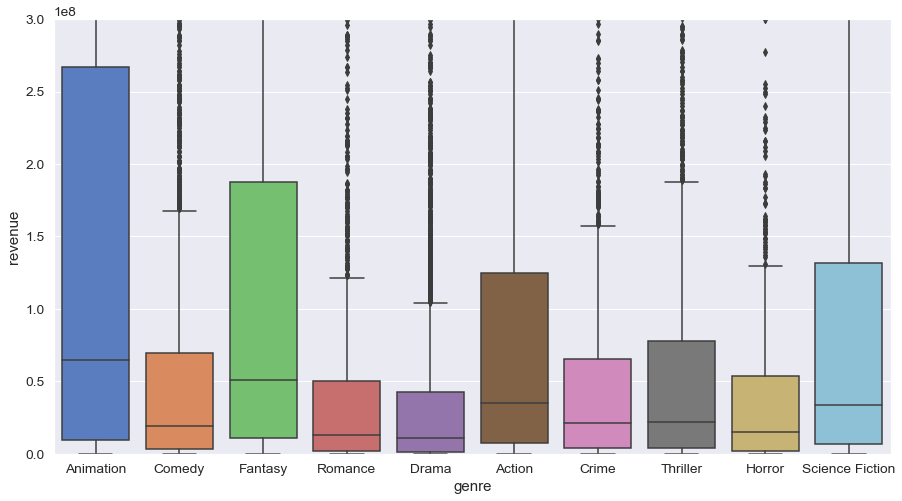

In [45]:
plt.figure(figsize=(18,8))
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
# لرسم بوكس بلوت يمثل التصنيف فيه المحور السيني والإيرادات المحور الصادي
sns.boxplot(x='genre', y='revenue', data=violin_movies, palette="muted", ax =ax)
# لتحديد مقياس المحور الصادي (من صفر إلى ٣٠٠ مليون دولار)
ax.set_ylim([0, 3e8])
plt.show()

**Animation** movies has the largest 25-75 range as well as the median revenue among all the genres plotted. **Fantasy** and **Science Fiction** have the second and third highest median revenue respectively. 

<span dir="rtl" align="right">

### يقوم الرسم بتقسيم إيرادات كل تصنيف
#### سنركز على القسم الموضح داخل صندوق، والذي يمثل ٢٥٪ و ٧٥٪ من البيانات، حيث يهمل البيانات الصغيرة جدًا والبيانات الكبيرة جدًا بما في ذلك البيانات الشاذة.
#### ونلاحظ أن أفلام الأنميشن هي التي تحمل أعلى إجمالي إيرادات للقسم المذكور، بالاضافة لأعلى قيمة للوسيط الحسابي للإيرادات، تليها أفلام الفانتزيا والخيال العلمي.. 

</span>